# XGBoost Model for Temperature Forecasting

This notebook prepares data for training a XGBoost model to predict hourly temperatures at RDU Airport.

**Training Period**: January 8, 2020 - September 16, 2025

**Prediction Target**: September 17-30, 2025 (14 days, 336 hours)

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load Training Data

In [2]:
# Load the training dataset
df = pd.read_csv('data/processed/xgb_train_full.csv')


print(f"Dataset shape: {df.shape}")
print(f"Date range: {df['time'].min()} to {df['time'].max()}")
print(f"\nColumns: {list(df.columns)}")
print("\nFirst 5 rows:")
df.head()

Dataset shape: (49896, 19)
Date range: 2020-01-08 00:00:00 to 2025-09-16 23:00:00

Columns: ['time', 'temp_obs', 'hour', 'day_of_week', 'is_weekend', 'sin_hour', 'cos_hour', 'sin_doy', 'cos_doy', 'temp_lag_1', 'temp_lag_24', 'temp_lag_48', 'temp_lag_72', 'temp_lag_168', 'temp_diff_1', 'roll_mean_24', 'roll_mean_168', 'roll_std_24', 'roll_std_168']

First 5 rows:


,time,temp_obs,hour,day_of_week,is_weekend,sin_hour,cos_hour,sin_doy,cos_doy,temp_lag_1,temp_lag_24,temp_lag_48,temp_lag_72,temp_lag_168,temp_diff_1,roll_mean_24,roll_mean_168,roll_std_24,roll_std_168
0,2020-01-08 00:00:00,1.0,0,2,0,0.000000,1.000000,0.137279,0.990532,0.8,4.2,4.6,6.2,6.4,-0.9,4.912500,8.136310,3.245909,4.258270
1,2020-01-08 01:00:00,1.8,1,2,0,0.258819,0.965926,0.137279,0.990532,1.0,3.3,4.5,5.2,5.6,0.2,4.850000,8.113690,3.292416,4.281850
2,2020-01-08 02:00:00,2.0,2,2,0,0.500000,0.866025,0.137279,0.990532,1.8,2.0,4.3,4.7,4.9,0.8,4.850000,8.096429,3.292416,4.300688
3,2020-01-08 03:00:00,2.0,3,2,0,0.707107,0.707107,0.137279,0.990532,2.0,1.4,4.1,4.0,4.7,0.2,4.875000,8.080357,3.267262,4.318464
4,2020-01-08 04:00:00,2.2,4,2,0,0.866025,0.500000,0.137279,0.990532,2.0,1.1,3.9,3.5,4.8,0.0,4.920833,8.064881,3.219368,4.334918


In [3]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

print("\nBasic statistics:")
df.describe()

Missing values per column:
time             0
temp_obs         0
hour             0
day_of_week      0
is_weekend       0
sin_hour         0
cos_hour         0
sin_doy          0
cos_doy          0
temp_lag_1       0
temp_lag_24      0
temp_lag_48      0
temp_lag_72      0
temp_lag_168     0
temp_diff_1      0
roll_mean_24     0
roll_mean_168    0
roll_std_24      0
roll_std_168     0
dtype: int64

Basic statistics:


,temp_obs,hour,day_of_week,is_weekend,sin_hour,cos_hour,sin_doy,cos_doy,temp_lag_1,temp_lag_24,temp_lag_48,temp_lag_72,temp_lag_168,temp_diff_1,roll_mean_24,roll_mean_168,roll_std_24,roll_std_168
count,49896.000000,49896.000000,49896.00000,49896.000000,4.989600e+04,4.989600e+04,49896.000000,49896.000000,49896.000000,49896.000000,49896.000000,49896.000000,49896.000000,49896.000000,49896.000000,49896.000000,49896.000000,49896.000000
mean,16.425874,11.500000,3.00000,0.285714,-1.792520e-17,-5.585826e-17,0.034512,-0.029742,16.425557,16.418891,16.412498,16.405556,16.385700,0.000315,16.422565,16.405149,3.522116,4.572061
std,8.919300,6.922256,2.00002,0.451758,7.071139e-01,7.071139e-01,0.704862,0.707894,8.919574,8.922642,8.924953,8.927416,8.931131,1.201576,8.153371,7.607027,1.124870,1.015535
min,-12.400000,0.000000,0.00000,0.000000,-1.000000e+00,-1.000000e+00,-0.999991,-0.999963,-12.400000,-12.400000,-12.400000,-12.400000,-12.400000,-8.700000,-8.625000,-1.784524,0.421673,2.299979
25%,9.775000,5.750000,1.00000,0.000000,-7.071068e-01,-7.071068e-01,-0.668064,-0.732494,9.700000,9.700000,9.700000,9.700000,9.700000,-0.600000,10.187500,10.174107,2.766156,3.842457
50%,17.400000,11.500000,3.00000,0.000000,6.123234e-17,-6.123234e-17,0.077386,-0.064508,17.400000,17.400000,17.400000,17.400000,17.400000,-0.100000,17.585417,16.734524,3.551648,4.464153
75%,23.300000,17.250000,5.00000,1.000000,7.071068e-01,7.071068e-01,0.735417,0.677615,23.300000,23.300000,23.300000,23.300000,23.300000,0.700000,23.450000,23.334673,4.286275,5.230897
max,38.300000,23.000000,6.00000,1.000000,1.000000e+00,1.000000e+00,0.999991,1.000000,38.300000,38.300000,38.300000,38.300000,38.300000,4.800000,32.245833,29.238095,8.283263,9.224108


## 3. Temporal Train/Validation Split

**Important**: We do NOT shuffle the data. We split chronologically:
- **Training set**: Earlier 90% of data
- **Validation set**: Later 10% of data

This simulates real-world forecasting where we train on past data and validate on future data.

In [4]:
# Ensure data is sorted by time (should already be sorted)
df = df.sort_values('time').reset_index(drop=True)

# Calculate split index (80/20 split)
train_size = 0.9
split_idx = int(len(df) * train_size)

# Split the data chronologically
train_df = df.iloc[:split_idx].copy()
val_df = df.iloc[split_idx:].copy()

print(f"{'='*60}")
print(f"TEMPORAL TRAIN/VALIDATION SPLIT")
print(f"{'='*60}")
print(f"\nTotal records: {len(df):,}")
print(f"\nTrain set:")
print(f"  - Size: {len(train_df):,} records ({len(train_df)/len(df)*100:.1f}%)")
print(f"  - Date range: {train_df['time'].min()} to {train_df['time'].max()}")
print(f"\nValidation set:")
print(f"  - Size: {len(val_df):,} records ({len(val_df)/len(df)*100:.1f}%)")
print(f"  - Date range: {val_df['time'].min()} to {val_df['time'].max()}")
print(f"\n✓ Temporal split complete - NO shuffling used!")
print(f"{'='*60}")

TEMPORAL TRAIN/VALIDATION SPLIT

Total records: 49,896

Train set:
  - Size: 44,906 records (90.0%)
  - Date range: 2020-01-08 00:00:00 to 2025-02-21 01:00:00

Validation set:
  - Size: 4,990 records (10.0%)
  - Date range: 2025-02-21 02:00:00 to 2025-09-16 23:00:00

✓ Temporal split complete - NO shuffling used!


## 4. Summary of Prepared Data

In [5]:
# Display feature columns
feature_cols = ['time', 'temp_obs', 'hour', 'day_of_week', 'is_weekend', 'sin_hour', 
                'cos_hour', 'sin_doy', 'cos_doy', 'temp_lag_1', 'temp_lag_24', 'temp_lag_48', 
                'temp_lag_72', 'temp_lag_168', 'temp_diff_1', 'roll_mean_24', 'roll_mean_168', 'roll_std_24', 'roll_std_168']

target_col = 'temp_obs'

print("Feature columns:")
for i, col in enumerate(feature_cols, 1):
    print(f"  {i}. {col}")

print(f"\nTarget column: {target_col}")

Feature columns:
  1. time
  2. temp_obs
  3. hour
  4. day_of_week
  5. is_weekend
  6. sin_hour
  7. cos_hour
  8. sin_doy
  9. cos_doy
  10. temp_lag_1
  11. temp_lag_24
  12. temp_lag_48
  13. temp_lag_72
  14. temp_lag_168
  15. temp_diff_1
  16. roll_mean_24
  17. roll_mean_168
  18. roll_std_24
  19. roll_std_168

Target column: temp_obs


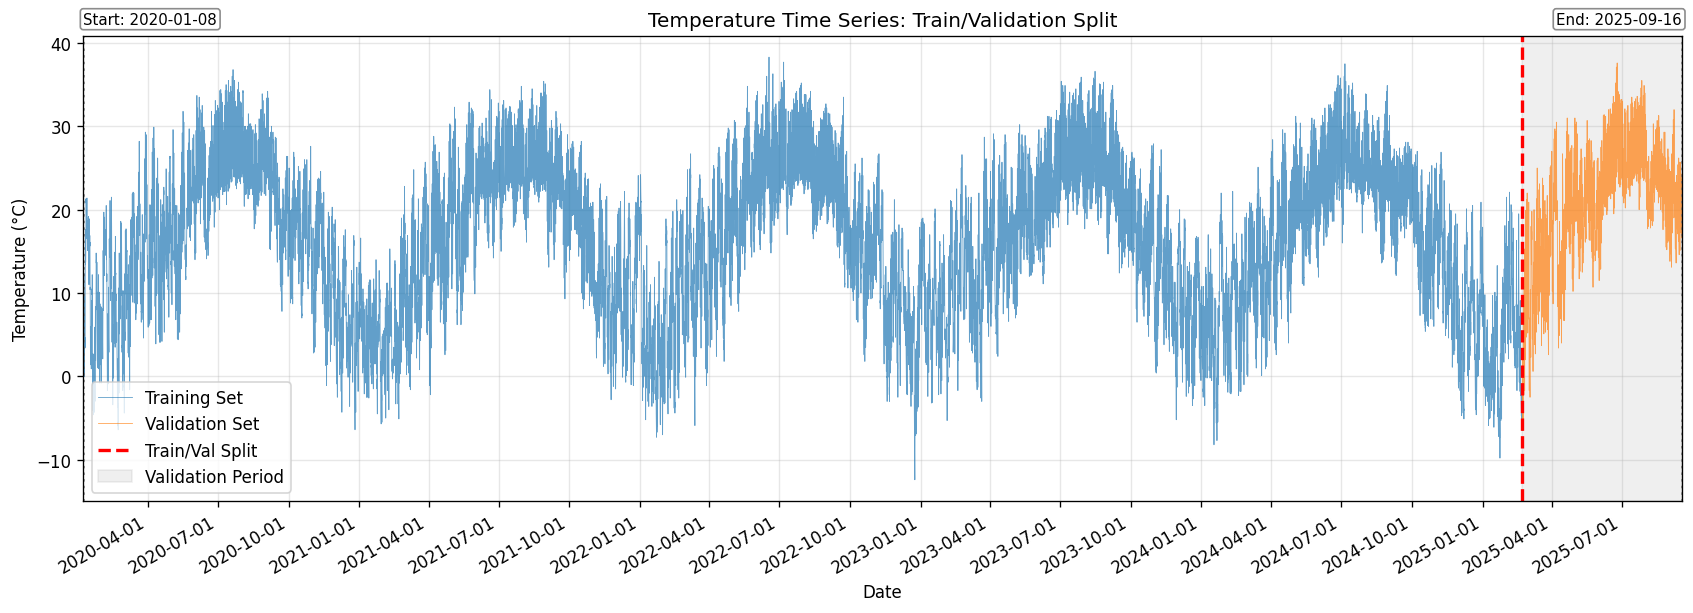

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.transforms import blended_transform_factory

# 1) 确保 time 列是 datetime
for df_ in (train_df, val_df):
    df_['time'] = pd.to_datetime(df_['time'], errors='coerce')
    df_.sort_values('time', inplace=True)

# 2) 计算起止时间（Timestamp）
start_ts = min(train_df['time'].min(), val_df['time'].min())
end_ts   = max(train_df['time'].max(), val_df['time'].max())

# 3) 生成用于注释的字符串
start_label = pd.to_datetime(start_ts).strftime('%Y-%m-%d')
end_label   = pd.to_datetime(end_ts).strftime('%Y-%m-%d')

# 4) 画图（与之前一致）
plt.close('all')
plt.rcParams.update({"figure.facecolor":"white","axes.facecolor":"white","figure.dpi":120,"savefig.dpi":120})
fig, ax = plt.subplots(figsize=(14,5), constrained_layout=True)

ax.plot(train_df['time'], train_df['temp_obs'], label='Training Set', alpha=0.7, linewidth=0.5)
ax.plot(val_df['time'],   val_df['temp_obs'],   label='Validation Set', alpha=0.7, linewidth=0.5)

split_ts = train_df['time'].max()
ax.axvline(split_ts, color='red', linestyle='--', linewidth=2, label='Train/Val Split')
ax.axvspan(val_df['time'].min(), val_df['time'].max(), color='gray', alpha=0.12, label='Validation Period')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=30, ha='right')

# 起止线 + 顶部标签（不会撑画布）
ax.axvline(start_ts, color='gray', linestyle=':', linewidth=1.5)
ax.axvline(end_ts,   color='gray', linestyle=':', linewidth=1.5)
trans = blended_transform_factory(ax.transData, ax.transAxes)
ax.text(start_ts, 1.02, f'Start: {start_label}', transform=trans, ha='left',  va='bottom',
        fontsize=9, bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='gray', alpha=0.9))
ax.text(end_ts,   1.02, f'End: {end_label}',   transform=trans, ha='right', va='bottom',
        fontsize=9, bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='gray', alpha=0.9))

ax.set_xlim(start_ts, end_ts)
ax.set_xlabel('Date'); ax.set_ylabel('Temperature (°C)')
ax.set_title('Temperature Time Series: Train/Validation Split')
ax.legend(); ax.grid(True, alpha=0.3)
plt.show()


## 5. Build XGBoost Model

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

# Define feature columns (EXCLUDE 'time' and target from features!)
feature_cols = ['hour', 'day_of_week', 'is_weekend', 'sin_hour', 
                'cos_hour', 'sin_doy', 'cos_doy', 'temp_lag_1', 'temp_lag_24', 'temp_lag_48', 
                'temp_lag_72', 'temp_lag_168', 'temp_diff_1', 'roll_mean_24', 
                'roll_mean_168', 'roll_std_24', 'roll_std_168']

target_col = 'temp_obs'

# Prepare training data
X_train = train_df[feature_cols]
y_train = train_df[target_col]

# Prepare validation data
X_val = val_df[feature_cols]
y_val = val_df[target_col]

print("Feature matrix shapes:")
print(f"  X_train: {X_train.shape}")
print(f"  y_train: {y_train.shape}")
print(f"  X_val: {X_val.shape}")
print(f"  y_val: {y_val.shape}")

print(f"\n✓ Data prepared for XGBoost modeling!")
print(f"\nFeatures used ({len(feature_cols)}):")
for i, col in enumerate(feature_cols, 1):
    print(f"  {i:2d}. {col}")

Feature matrix shapes:
  X_train: (44906, 17)
  y_train: (44906,)
  X_val: (4990, 17)
  y_val: (4990,)

✓ Data prepared for XGBoost modeling!

Features used (17):
   1. hour
   2. day_of_week
   3. is_weekend
   4. sin_hour
   5. cos_hour
   6. sin_doy
   7. cos_doy
   8. temp_lag_1
   9. temp_lag_24
  10. temp_lag_48
  11. temp_lag_72
  12. temp_lag_168
  13. temp_diff_1
  14. roll_mean_24
  15. roll_mean_168
  16. roll_std_24
  17. roll_std_168


## 7. Train the Model

In [8]:
# Initialize XGBoost Regressor
model = xgb.XGBRegressor(
    n_estimators=500,           # Number of boosting rounds
    max_depth=6,                # Maximum tree depth
    learning_rate=0.05,         # Step size shrinkage
    subsample=0.8,              # Subsample ratio of training instances
    colsample_bytree=0.8,       # Subsample ratio of features
    min_child_weight=3,         # Minimum sum of instance weight
    gamma=0.1,                  # Minimum loss reduction
    reg_alpha=0.1,              # L1 regularization
    reg_lambda=1.0,             # L2 regularization
    random_state=42,
    n_jobs=-1,                  # Use all CPU cores
    early_stopping_rounds=50    # Stop if no improvement
)

print("Training XGBoost model...")
print("=" * 60)

# Train with early stopping
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=50  # Print every 50 rounds
)

print("\n✓ Model training complete!")
print(f"Best iteration: {model.best_iteration}")
print(f"Best validation score: {model.best_score:.4f}")

Training XGBoost model...
[0]	validation_0-rmse:8.56686	validation_1-rmse:8.12677
[50]	validation_0-rmse:1.05170	validation_1-rmse:1.02899
[100]	validation_0-rmse:0.69462	validation_1-rmse:0.71277
[150]	validation_0-rmse:0.65745	validation_1-rmse:0.69306
[200]	validation_0-rmse:0.63788	validation_1-rmse:0.68522
[250]	validation_0-rmse:0.62178	validation_1-rmse:0.68264
[300]	validation_0-rmse:0.60781	validation_1-rmse:0.68044
[350]	validation_0-rmse:0.59627	validation_1-rmse:0.68024
[364]	validation_0-rmse:0.59287	validation_1-rmse:0.68072

✓ Model training complete!
Best iteration: 314
Best validation score: 0.6799


## 8. Evaluate on Validation Set

In [9]:
# Make predictions on both training and validation sets
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Calculate metrics for training set
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for validation set
val_mae = mean_absolute_error(y_val, y_val_pred)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)

# Display results
print(f"{'='*60}")
print(f"XGBOOST MODEL EVALUATION RESULTS")  # ← 改了这里
print(f"{'='*60}\n")

print("Training Set Performance:")
print(f"  MAE:  {train_mae:.4f} °C")
print(f"  RMSE: {train_rmse:.4f} °C")
print(f"  R²:   {train_r2:.4f}")

print("\nValidation Set Performance:")
print(f"  MAE:  {val_mae:.4f} °C")
print(f"  RMSE: {val_rmse:.4f} °C")
print(f"  R²:   {val_r2:.4f}")

print(f"\n{'='*60}")

# Add predictions to dataframes for visualization
train_df['predictions'] = y_train_pred
val_df['predictions'] = y_val_pred

XGBOOST MODEL EVALUATION RESULTS

Training Set Performance:
  MAE:  0.4168 °C
  RMSE: 0.6045 °C
  R²:   0.9955

Validation Set Performance:
  MAE:  0.4437 °C
  RMSE: 0.6799 °C
  R²:   0.9910



Mean Absolute Error (MAE) takes every prediction error, removes the sign, and calculates for the average error rate. With a rate of around 0.55, it's even below the human detection threshold of around 1-2 degrees Celsius. Our model is performing well.

Root Mean Square Error (RMSE) penalizes larger errors more. Our RMSE/MAE ratio of 1.25 suggests consistent errors without too high of outliers.

With an R^2 of 0.97, our features capture mostly all of the predictable patterns in temperature.

Feature Importance Ranking:
      feature  importance
   temp_lag_1    0.694683
 roll_mean_24    0.216666
  temp_lag_24    0.041449
     cos_hour    0.013011
         hour    0.012562
  temp_lag_48    0.005271
     sin_hour    0.004885
  temp_diff_1    0.004661
  roll_std_24    0.001904
      cos_doy    0.001476
roll_mean_168    0.000837
 temp_lag_168    0.000607
  temp_lag_72    0.000598
      sin_doy    0.000517
   is_weekend    0.000326
 roll_std_168    0.000288
  day_of_week    0.000258


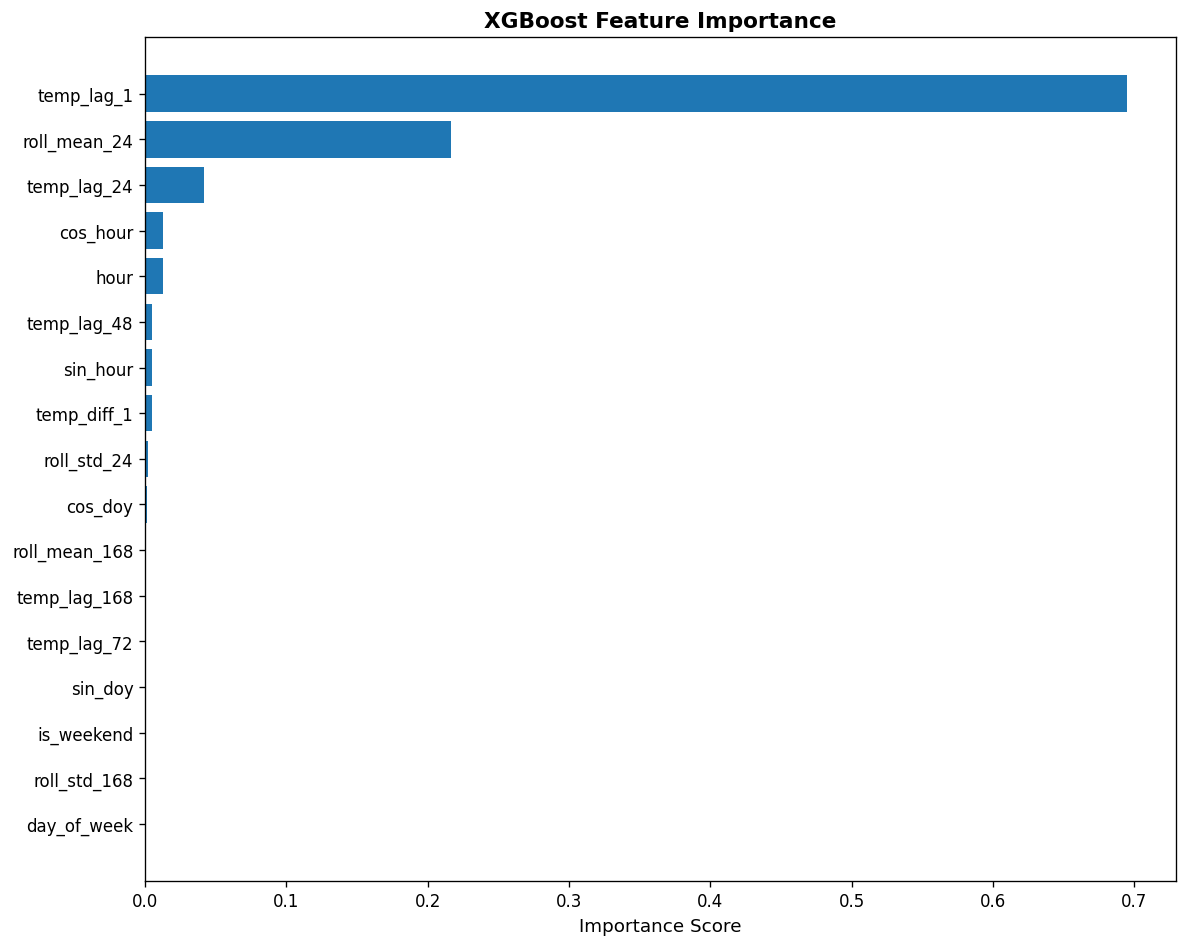

In [10]:
# Get and visualize feature importance
import pandas as pd

feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance Ranking:")
print(feature_importance.to_string(index=False))

# Plot feature importance
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(range(len(feature_importance)), feature_importance['importance'])
ax.set_yticks(range(len(feature_importance)))
ax.set_yticklabels(feature_importance['feature'])
ax.set_xlabel('Importance Score', fontsize=11)
ax.set_title('XGBoost Feature Importance', fontsize=13, fontweight='bold')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

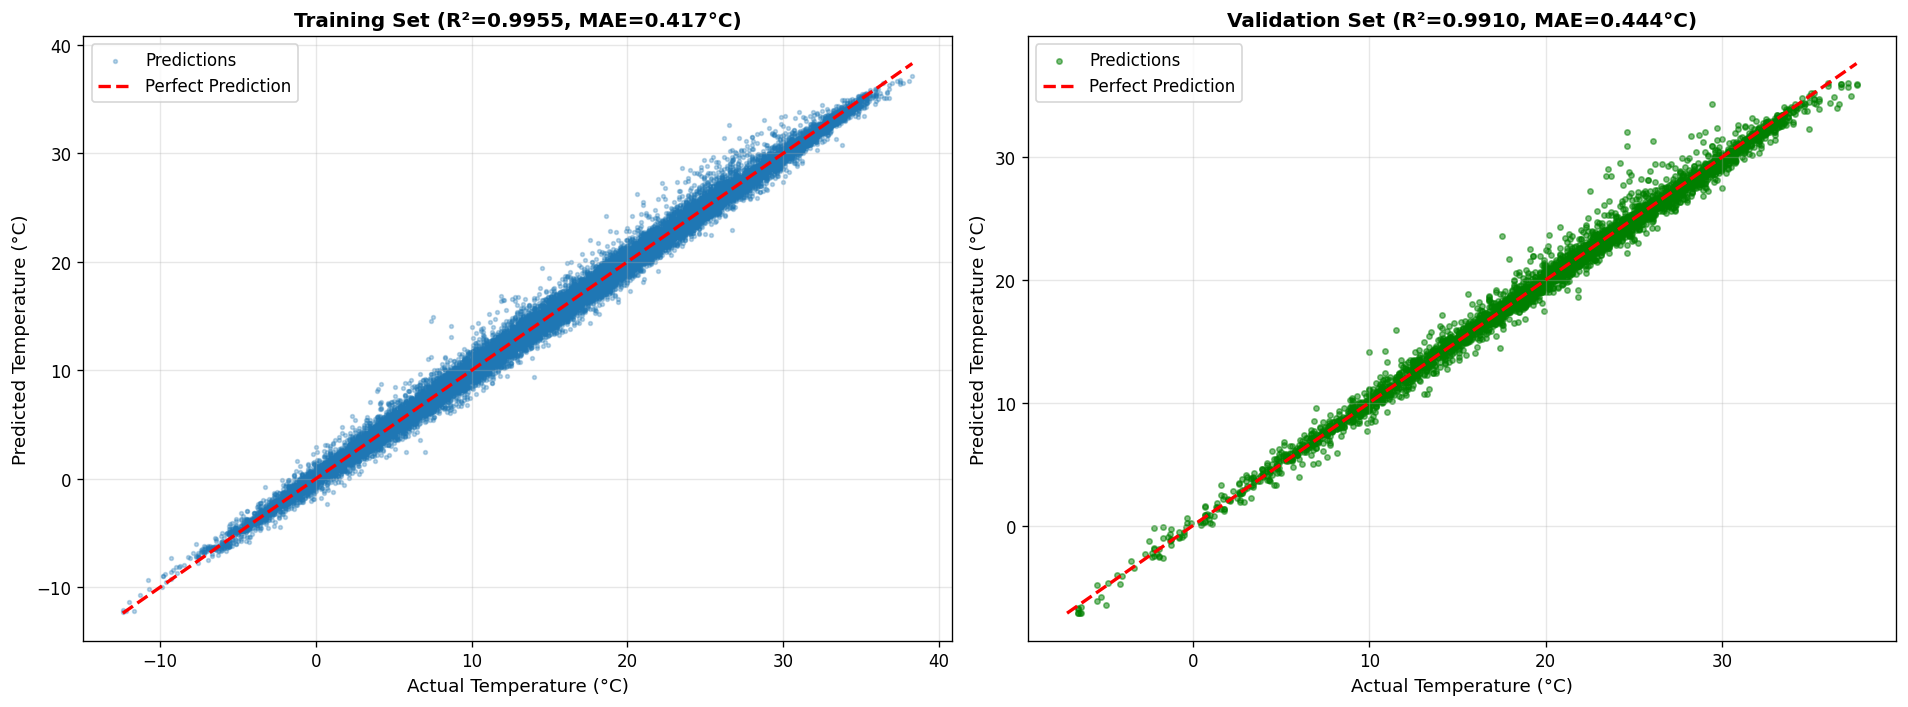

In [11]:
# Visualization: Predicted vs Actual for Validation Set
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Training set
axes[0].scatter(y_train, y_train_pred, alpha=0.3, s=5, label='Predictions')
min_val = min(y_train.min(), y_train_pred.min())
max_val = max(y_train.max(), y_train_pred.max())
axes[0].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Temperature (°C)', fontsize=11)
axes[0].set_ylabel('Predicted Temperature (°C)', fontsize=11)
axes[0].set_title(f'Training Set (R²={train_r2:.4f}, MAE={train_mae:.3f}°C)', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Validation set
axes[1].scatter(y_val, y_val_pred, alpha=0.5, s=10, color='green', label='Predictions')
min_val = min(y_val.min(), y_val_pred.min())
max_val = max(y_val.max(), y_val_pred.max())
axes[1].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Temperature (°C)', fontsize=11)
axes[1].set_ylabel('Predicted Temperature (°C)', fontsize=11)
axes[1].set_title(f'Validation Set (R²={val_r2:.4f}, MAE={val_mae:.3f}°C)', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

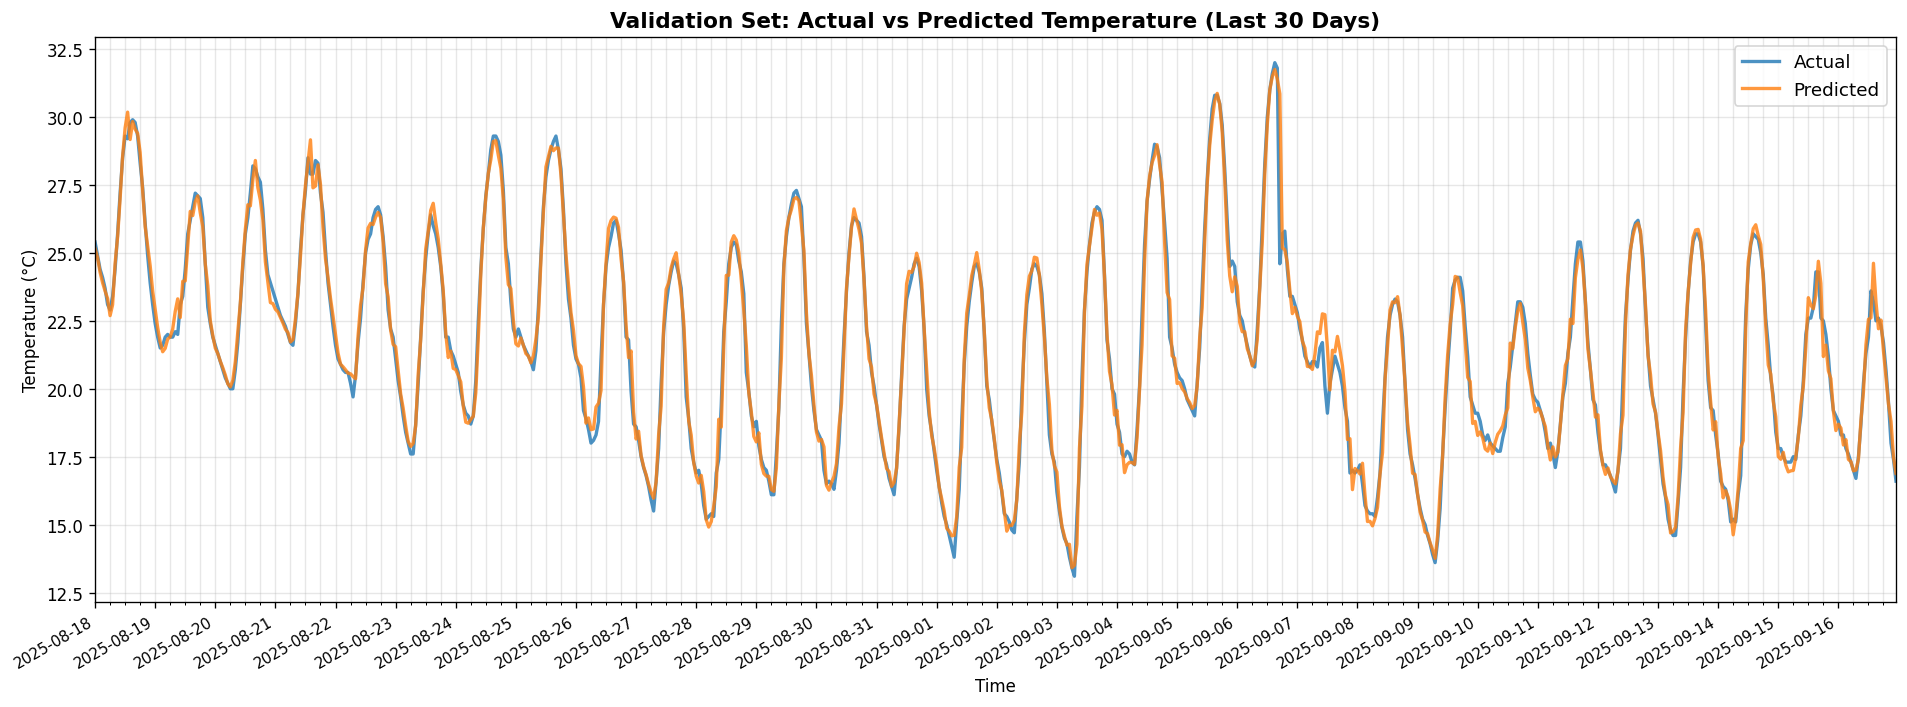

In [12]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(16, 6))

plot_val = val_df.tail(30*24)  # Last 30 days (hourly)
# 如果 time 还是字符串，先转一次：
plot_val = plot_val.copy()
plot_val['time'] = pd.to_datetime(plot_val['time'], errors='coerce')

ax.plot(plot_val['time'], plot_val['temp_obs'], label='Actual', linewidth=2, alpha=0.8)
ax.plot(plot_val['time'], plot_val['predictions'], label='Predicted', linewidth=2, alpha=0.8)

# ==== 关键：控制横轴刻度密度 ====
# 主刻度：每天一个
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# 细刻度：每6小时一个（仅做参考线，不显示标签）
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=[0,6,12,18]))

# 标签旋转 & 间距
plt.xticks(rotation=30, ha='right')
ax.tick_params(axis='x', which='major', labelsize=9)
ax.margins(x=0.01)

# 可选：仅显示最近30天范围，防止溢出
ax.set_xlim(plot_val['time'].min(), plot_val['time'].max())

ax.set_xlabel('Time')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Validation Set: Actual vs Predicted Temperature (Last 30 Days)', fontsize=13, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, which='both')  # 主次网格都开
plt.tight_layout()
plt.show()


In [13]:
# Load test data with climatology features
test_df = pd.read_csv('data/processed/xgb_test_features_wf_2025-09-17_to_09-30.csv')
test_df['time'] = pd.to_datetime(test_df['time'])

print(f"Test data loaded: {len(test_df)} rows")
print(f"Date range: {test_df['time'].min()} to {test_df['time'].max()}")

# Prepare test features (same feature columns)
X_test = test_df[feature_cols]
y_test = test_df['temp_obs']

# Make predictions
y_test_pred = model.predict(X_test)

# Calculate test metrics
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print(f"\n{'='*60}")
print(f"TEST SET PERFORMANCE (with Climatology Features)")
print(f"{'='*60}")
print(f"  MAE:  {test_mae:.4f} °C")
print(f"  RMSE: {test_rmse:.4f} °C")
print(f"  R²:   {test_r2:.4f}")
print(f"{'='*60}")

# Add predictions to test dataframe
test_df['predictions'] = y_test_pred
test_df['residuals'] = test_df['temp_obs'] - test_df['predictions']

Test data loaded: 336 rows
Date range: 2025-09-17 00:00:00 to 2025-09-30 23:00:00

TEST SET PERFORMANCE (with Climatology Features)
  MAE:  3.0896 °C
  RMSE: 3.8022 °C
  R²:   0.0785


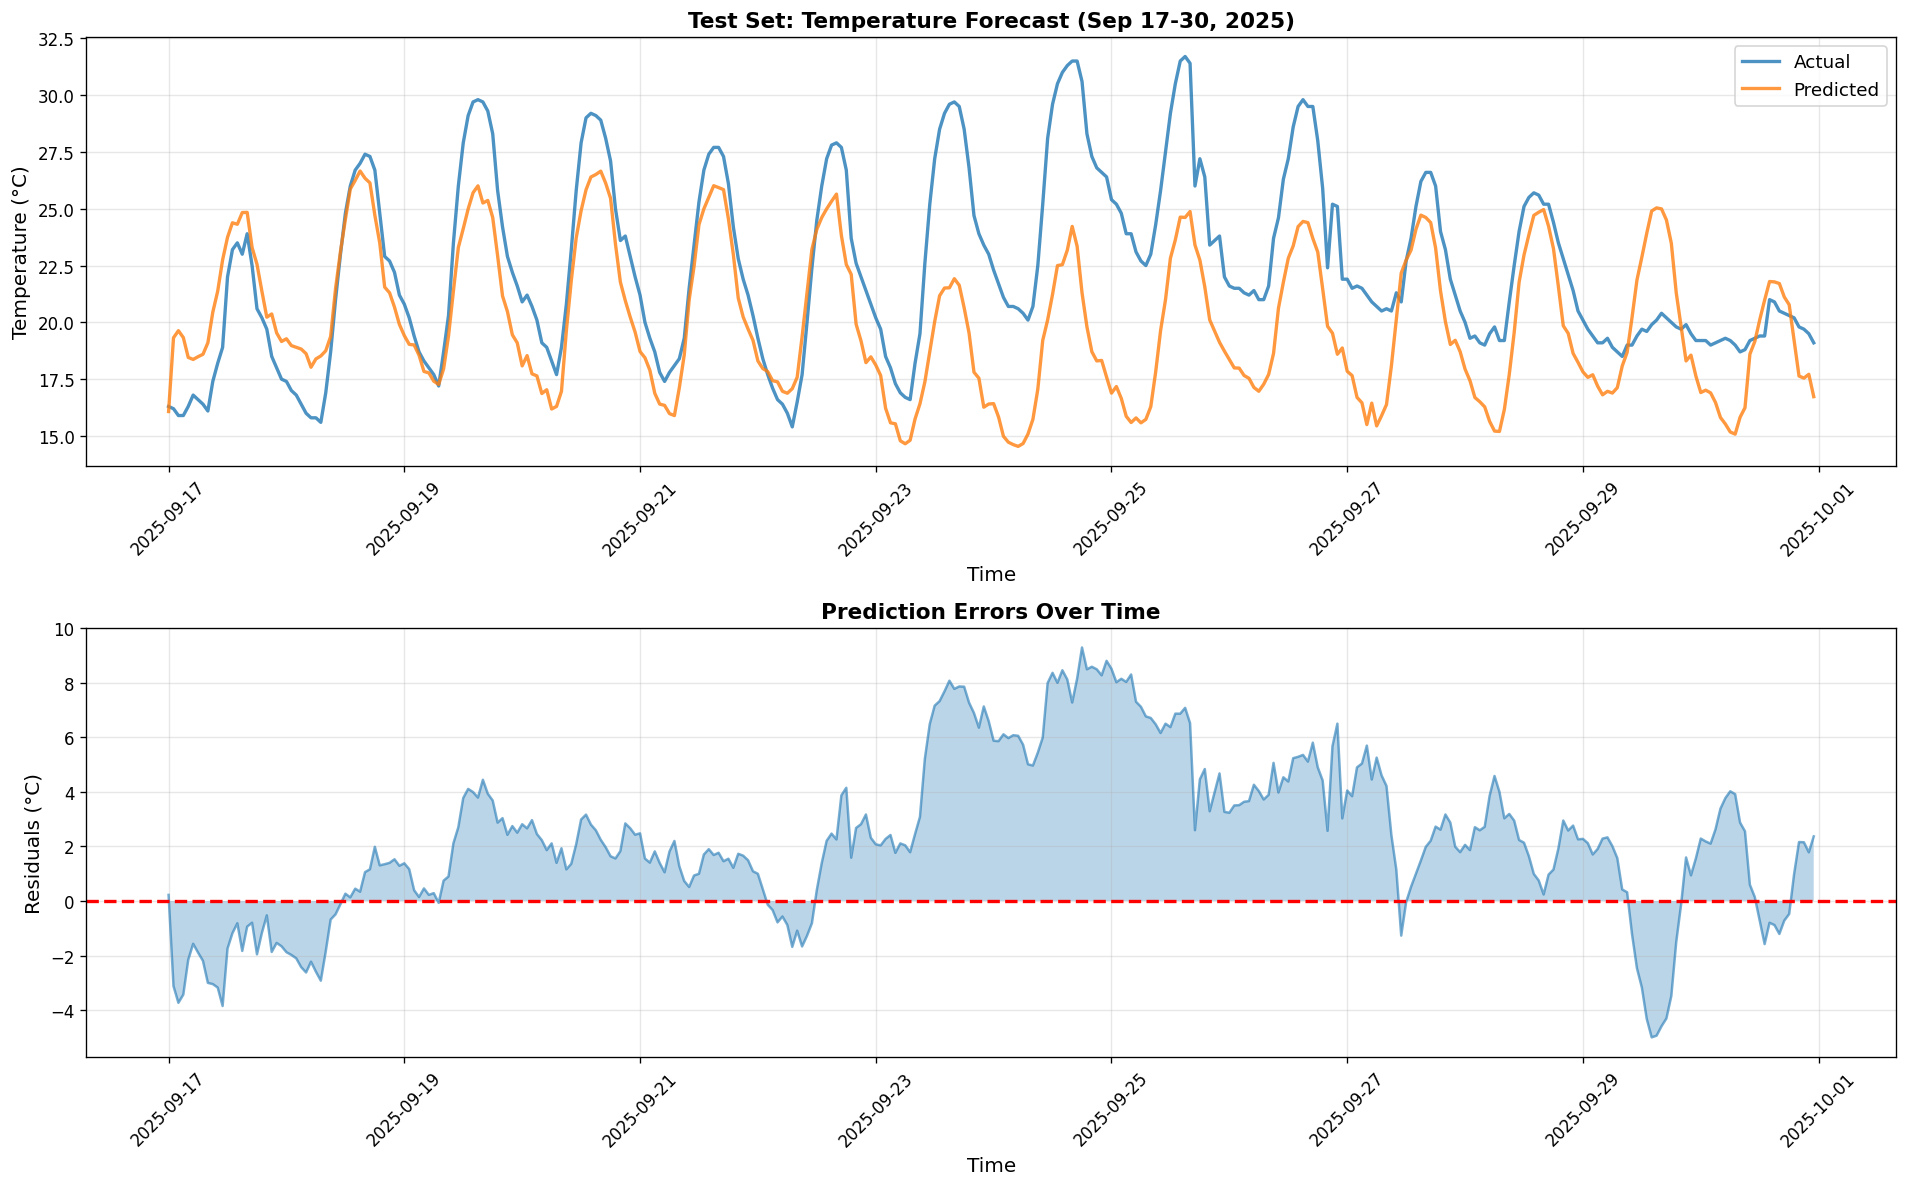

In [14]:
# Visualize test set predictions
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Time series plot
axes[0].plot(test_df['time'], test_df['temp_obs'], label='Actual', linewidth=2, alpha=0.8)
axes[0].plot(test_df['time'], test_df['predictions'], label='Predicted', linewidth=2, alpha=0.8)
axes[0].set_xlabel('Time', fontsize=12)
axes[0].set_ylabel('Temperature (°C)', fontsize=12)
axes[0].set_title('Test Set: Temperature Forecast (Sep 17-30, 2025)', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45)

# Residuals plot
axes[1].plot(test_df['time'], test_df['residuals'], alpha=0.6, linewidth=1.5)
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1].fill_between(test_df['time'], test_df['residuals'], 0, alpha=0.3)
axes[1].set_xlabel('Time', fontsize=12)
axes[1].set_ylabel('Residuals (°C)', fontsize=12)
axes[1].set_title('Prediction Errors Over Time', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()

In [21]:
# Load test data with climatology features
test_df = pd.read_csv('data/processed/cheat_test.csv')
test_df['time'] = pd.to_datetime(test_df['time'])

print(f"Test data loaded: {len(test_df)} rows")
print(f"Date range: {test_df['time'].min()} to {test_df['time'].max()}")

# Prepare test features (same feature columns)
X_test = test_df[feature_cols]
y_test = test_df['temp_obs']

# Make predictions
y_test_pred = model.predict(X_test)

# Calculate test metrics
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print(f"\n{'='*60}")
print(f"TEST SET PERFORMANCE (with cheat features)")
print(f"{'='*60}")
print(f"  MAE:  {test_mae:.4f} °C")
print(f"  RMSE: {test_rmse:.4f} °C")
print(f"  R²:   {test_r2:.4f}")
print(f"{'='*60}")

# Add predictions to test dataframe
test_df['predictions'] = y_test_pred
test_df['residuals'] = test_df['temp_obs'] - test_df['predictions']

Test data loaded: 336 rows
Date range: 2025-09-17 00:00:00 to 2025-09-30 23:00:00

TEST SET PERFORMANCE (with cheat features)
  MAE:  0.4126 °C
  RMSE: 0.6036 °C
  R²:   0.9768


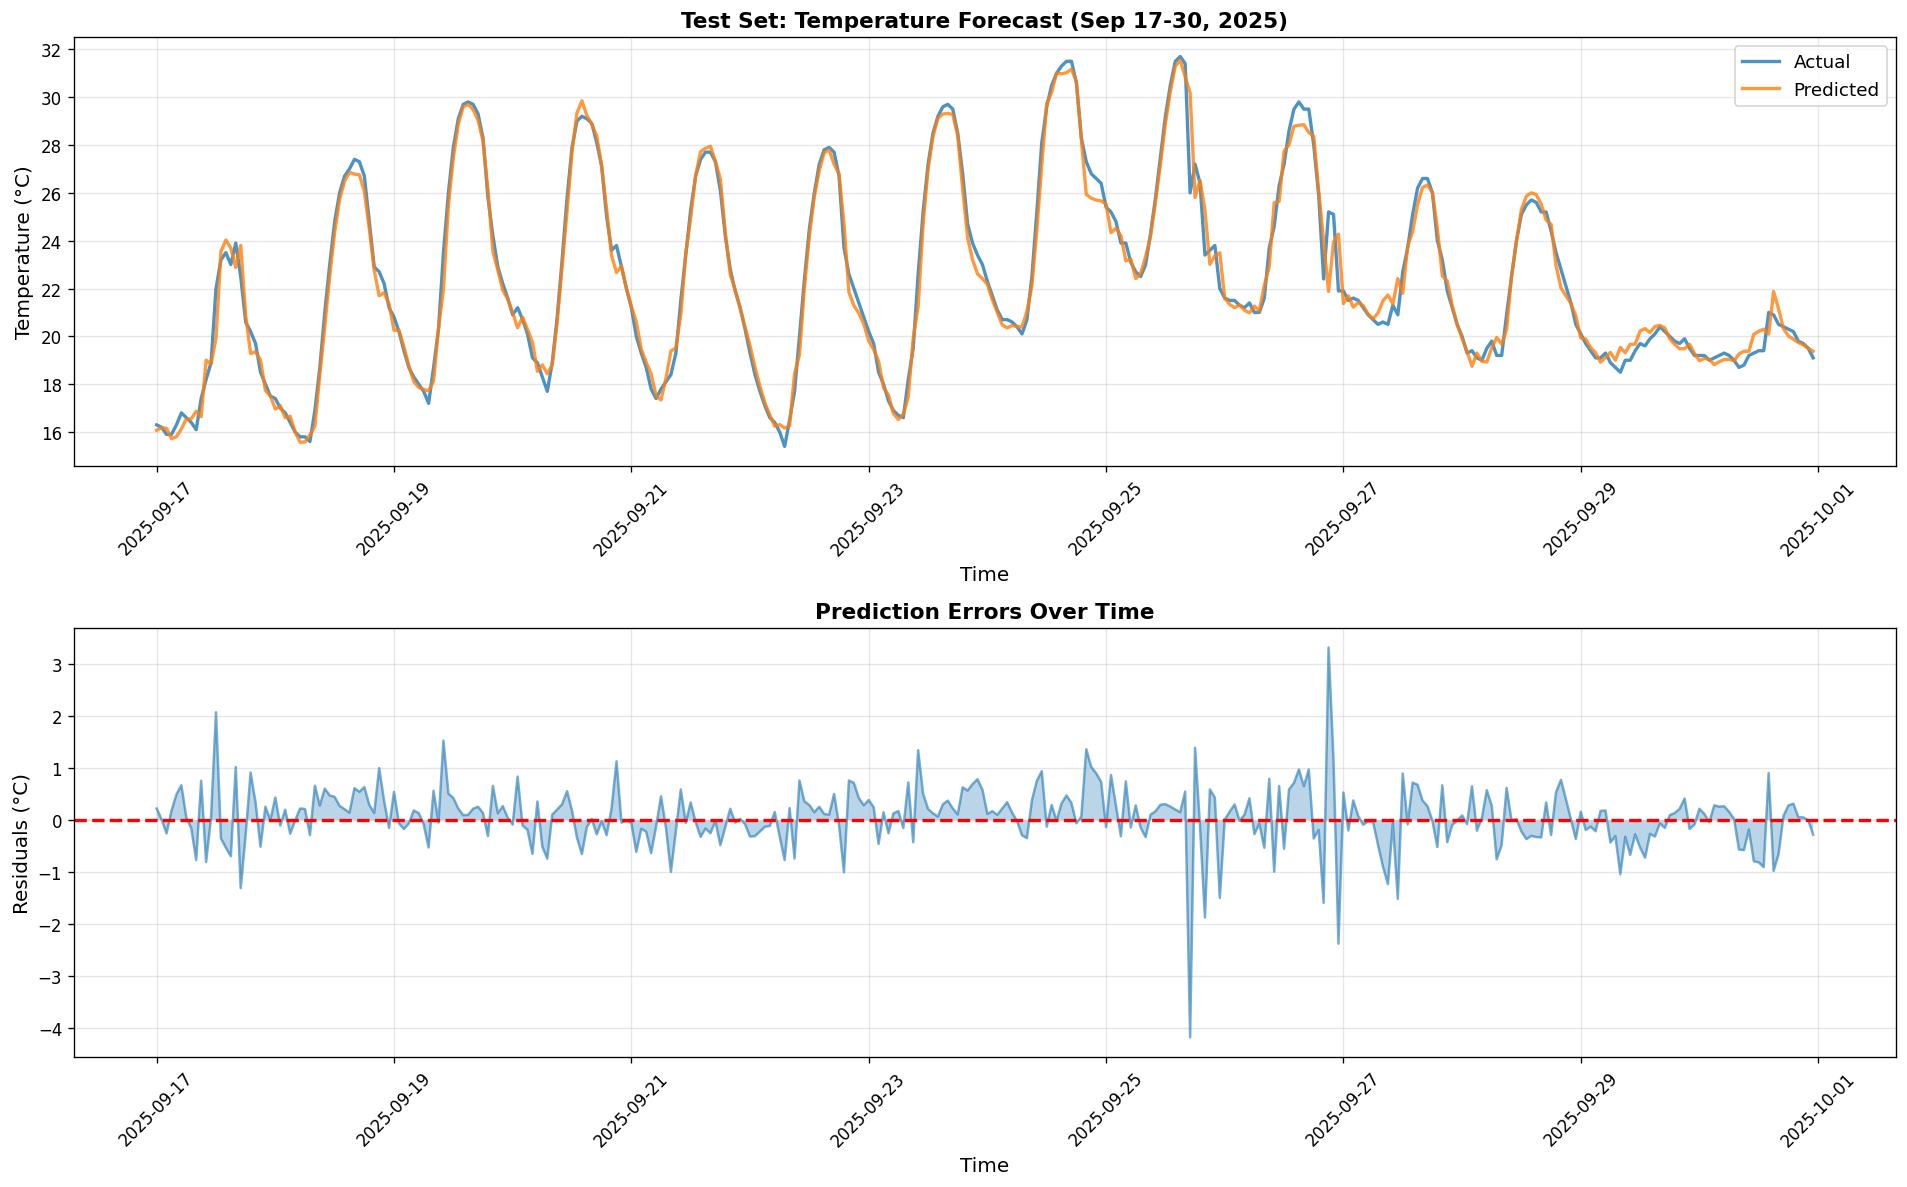

In [22]:
# Visualize test set predictions
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Time series plot
axes[0].plot(test_df['time'], test_df['temp_obs'], label='Actual', linewidth=2, alpha=0.8)
axes[0].plot(test_df['time'], test_df['predictions'], label='Predicted', linewidth=2, alpha=0.8)
axes[0].set_xlabel('Time', fontsize=12)
axes[0].set_ylabel('Temperature (°C)', fontsize=12)
axes[0].set_title('Test Set: Temperature Forecast (Sep 17-30, 2025)', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45)

# Residuals plot
axes[1].plot(test_df['time'], test_df['residuals'], alpha=0.6, linewidth=1.5)
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1].fill_between(test_df['time'], test_df['residuals'], 0, alpha=0.3)
axes[1].set_xlabel('Time', fontsize=12)
axes[1].set_ylabel('Residuals (°C)', fontsize=12)
axes[1].set_title('Prediction Errors Over Time', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()

In [17]:
# ============================================================================
# Cell 16: Rolling Forecast (用预测值作为未来的lag)
# ============================================================================

def rolling_forecast_xgb(model, test_df, history_df, feature_cols):
    """
    滚动预测：用预测值更新lag features
    """
    from datetime import timedelta
    
    predictions = []
    rolling_history = history_df[['time', 'temp_obs']].copy()
    
    print("Starting rolling forecast...")
    print(f"Initial history size: {len(rolling_history)} hours")
    
    for idx, row in test_df.iterrows():
        current_time = row['time']
        
        # 1. 时间特征（直接从test_df获取）
        time_features = {
            'hour': row['hour'],
            'day_of_week': row['day_of_week'],
            'is_weekend': row['is_weekend'],
            'sin_hour': row['sin_hour'],
            'cos_hour': row['cos_hour'],
            'sin_doy': row['sin_doy'],
            'cos_doy': row['cos_doy'],
        }
        
        # 2. 动态计算lag features（从rolling_history）
        lag_features = {}
        
        # Lag values
        for lag_h in [1, 24, 48, 72, 168]:
            lag_time = current_time - timedelta(hours=lag_h)
            lag_row = rolling_history[rolling_history['time'] == lag_time]
            if len(lag_row) > 0:
                lag_features[f'temp_lag_{lag_h}'] = lag_row.iloc[0]['temp_obs']
            else:
                lag_features[f'temp_lag_{lag_h}'] = np.nan
        
        # Diff feature
        lag_1_time = current_time - timedelta(hours=1)
        lag_2_time = current_time - timedelta(hours=2)
        lag_1_val = rolling_history[rolling_history['time'] == lag_1_time]
        lag_2_val = rolling_history[rolling_history['time'] == lag_2_time]
        
        if len(lag_1_val) > 0 and len(lag_2_val) > 0:
            lag_features['temp_diff_1'] = lag_1_val.iloc[0]['temp_obs'] - lag_2_val.iloc[0]['temp_obs']
        else:
            lag_features['temp_diff_1'] = np.nan
        
        # Rolling features
        recent_24h = rolling_history[
            (rolling_history['time'] > current_time - timedelta(hours=24)) &
            (rolling_history['time'] <= current_time)
        ]['temp_obs']
        
        recent_168h = rolling_history[
            (rolling_history['time'] > current_time - timedelta(hours=168)) &
            (rolling_history['time'] <= current_time)
        ]['temp_obs']
        
        if len(recent_24h) >= 12:
            lag_features['roll_mean_24'] = recent_24h.mean()
            lag_features['roll_std_24'] = recent_24h.std()
        else:
            lag_features['roll_mean_24'] = np.nan
            lag_features['roll_std_24'] = np.nan
        
        if len(recent_168h) >= 84:
            lag_features['roll_mean_168'] = recent_168h.mean()
            lag_features['roll_std_168'] = recent_168h.std()
        else:
            lag_features['roll_mean_168'] = np.nan
            lag_features['roll_std_168'] = np.nan
        
        # 3. 合并特征并预测
        all_features = {**time_features, **lag_features}
        X = pd.DataFrame([all_features])[feature_cols]
        
        # 处理NaN（用历史均值填充）
        X = X.fillna(X.mean())
        
        pred = model.predict(X)[0]
        predictions.append(pred)
        
        # 4. 将预测值加入历史，用于下一步
        new_row = pd.DataFrame({
            'time': [current_time],
            'temp_obs': [pred]  # ⚠️ 用预测值！
        })
        rolling_history = pd.concat([rolling_history, new_row], ignore_index=True)
        
        if (idx + 1) % 24 == 0:
            print(f"  Predicted {idx + 1}/{len(test_df)} hours...")
    
    return predictions


# 读取训练集末尾作为初始历史
train_full = pd.read_csv('data/processed/xgb_train_full.csv')
train_full['time'] = pd.to_datetime(train_full['time'])
initial_history = train_full[['time', 'temp_obs']].tail(200)  # 取最后200小时

# 重新读取test data（不用之前的climatology版本）
test_df_rolling = pd.read_csv('data/processed/xgb_test_features_wf_2025-09-17_to_09-30.csv')
test_df_rolling['time'] = pd.to_datetime(test_df_rolling['time'])

# 添加时间特征
def add_time_features(df):
    df['hour'] = df['time'].dt.hour
    df['day_of_week'] = df['time'].dt.dayofweek
    df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
    df['sin_hour'] = np.sin(2 * np.pi * df['hour'] / 24.0)
    df['cos_hour'] = np.cos(2 * np.pi * df['hour'] / 24.0)
    doy = df['time'].dt.dayofyear
    df['sin_doy'] = np.sin(2 * np.pi * doy / 365.0)
    df['cos_doy'] = np.cos(2 * np.pi * doy / 365.0)
    return df

test_df_rolling = add_time_features(test_df_rolling)

# 执行滚动预测
predictions_rolling = rolling_forecast_xgb(
    model, test_df_rolling, initial_history, feature_cols
)

test_df_rolling['predictions_rolling'] = predictions_rolling
test_df_rolling['residuals_rolling'] = test_df_rolling['temp_obs'] - test_df_rolling['predictions_rolling']

# 计算滚动预测的metrics
test_mae_rolling = mean_absolute_error(test_df_rolling['temp_obs'], predictions_rolling)
test_rmse_rolling = np.sqrt(mean_squared_error(test_df_rolling['temp_obs'], predictions_rolling))
test_r2_rolling = r2_score(test_df_rolling['temp_obs'], predictions_rolling)

print(f"\n{'='*60}")
print(f"ROLLING FORECAST PERFORMANCE")
print(f"{'='*60}")
print(f"  MAE:  {test_mae_rolling:.4f} °C")
print(f"  RMSE: {test_rmse_rolling:.4f} °C")
print(f"  R²:   {test_r2_rolling:.4f}")
print(f"{'='*60}")

Starting rolling forecast...
Initial history size: 200 hours
  Predicted 24/336 hours...
  Predicted 48/336 hours...
  Predicted 72/336 hours...
  Predicted 96/336 hours...
  Predicted 120/336 hours...
  Predicted 144/336 hours...
  Predicted 168/336 hours...
  Predicted 192/336 hours...
  Predicted 216/336 hours...
  Predicted 240/336 hours...
  Predicted 264/336 hours...
  Predicted 288/336 hours...
  Predicted 312/336 hours...
  Predicted 336/336 hours...

ROLLING FORECAST PERFORMANCE
  MAE:  5.0471 °C
  RMSE: 5.6117 °C
  R²:   -1.0072


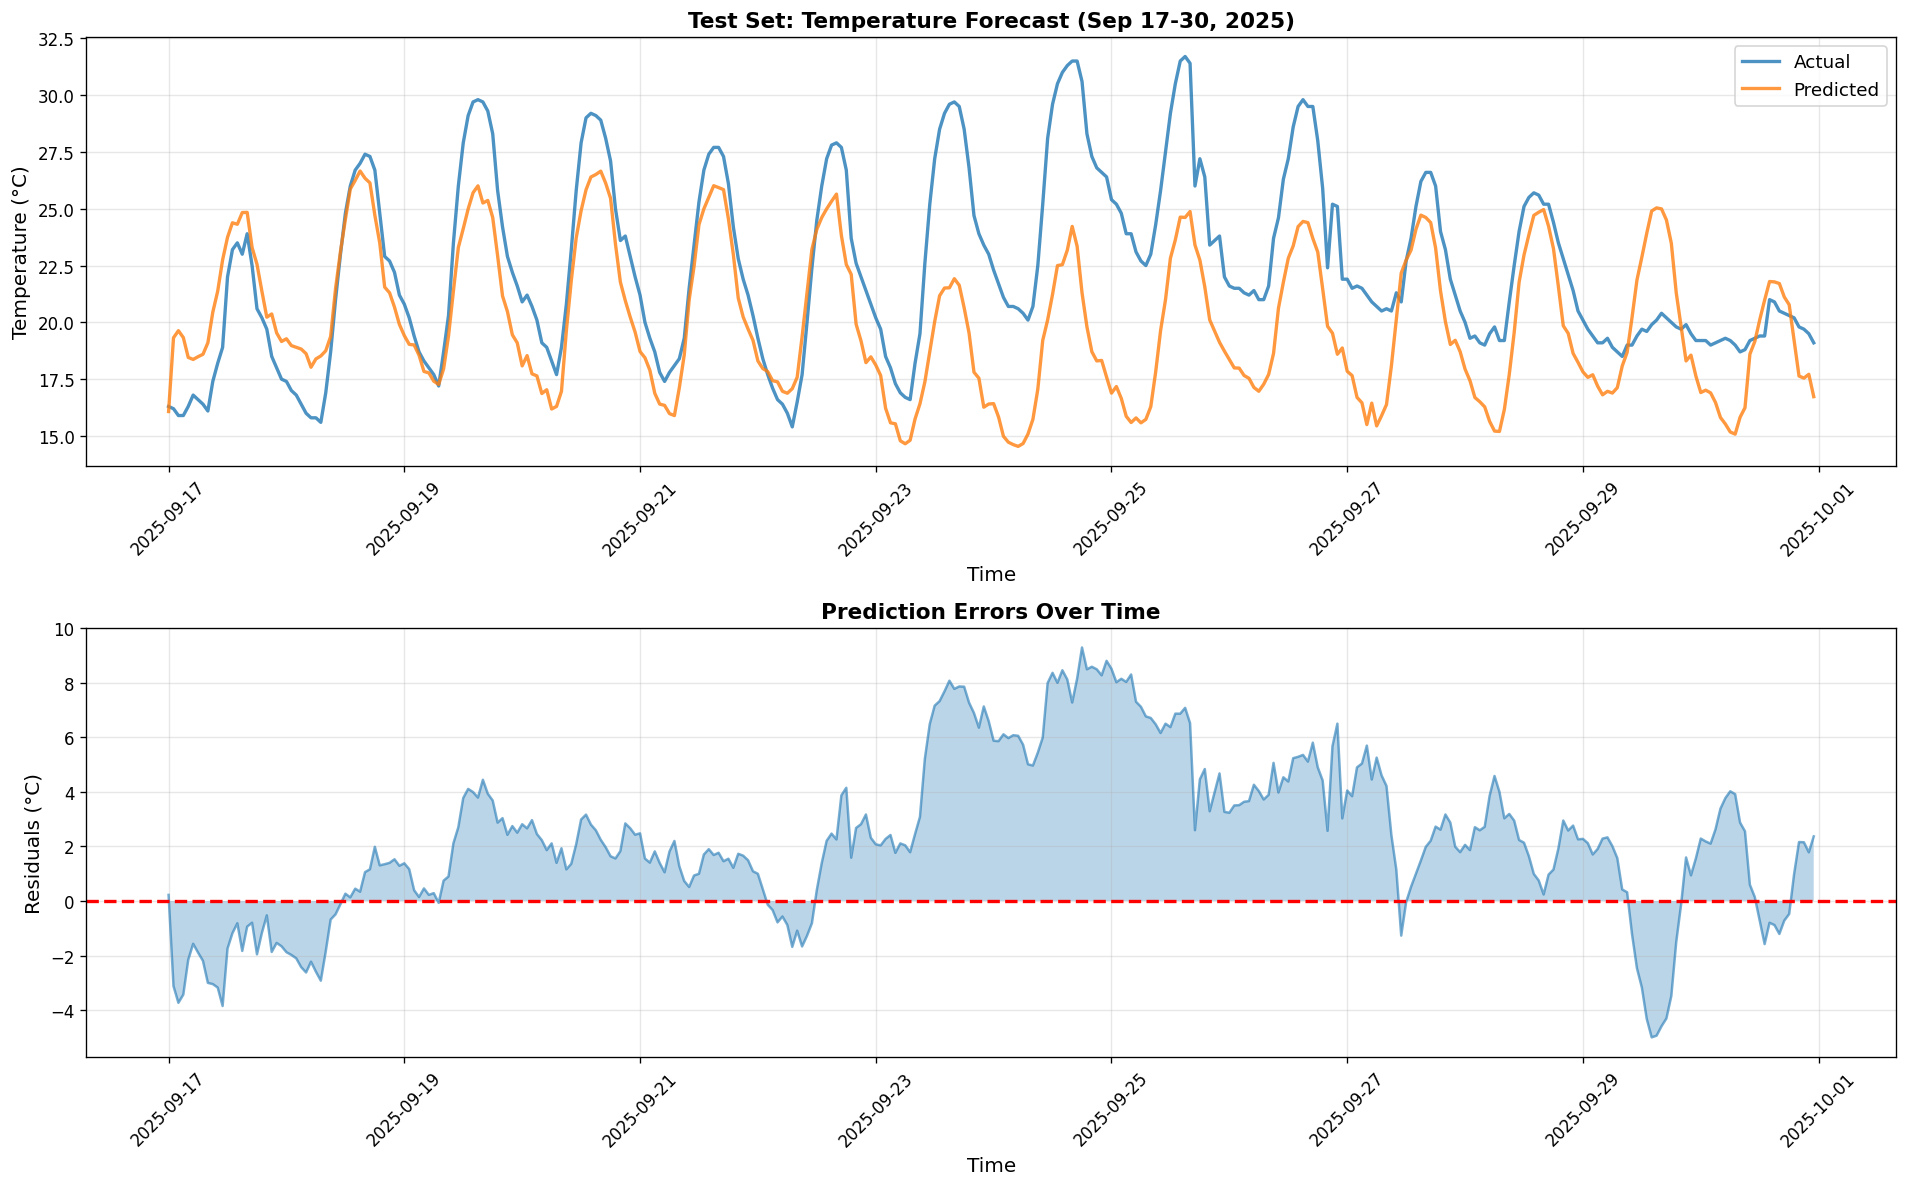

In [18]:
# Visualize test set predictions
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Time series plot
axes[0].plot(test_df['time'], test_df['temp_obs'], label='Actual', linewidth=2, alpha=0.8)
axes[0].plot(test_df['time'], test_df['predictions'], label='Predicted', linewidth=2, alpha=0.8)
axes[0].set_xlabel('Time', fontsize=12)
axes[0].set_ylabel('Temperature (°C)', fontsize=12)
axes[0].set_title('Test Set: Temperature Forecast (Sep 17-30, 2025)', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45)

# Residuals plot
axes[1].plot(test_df['time'], test_df['residuals'], alpha=0.6, linewidth=1.5)
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1].fill_between(test_df['time'], test_df['residuals'], 0, alpha=0.3)
axes[1].set_xlabel('Time', fontsize=12)
axes[1].set_ylabel('Residuals (°C)', fontsize=12)
axes[1].set_title('Prediction Errors Over Time', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()

Daily Forecast Performance:
 Climatology_MAE  Climatology_Std  Rolling_MAE  Rolling_Std  Day
           1.976            1.033        0.982        0.686    1
           1.423            0.851        3.242        1.491    2
           2.164            1.505        5.369        0.855    3
           2.241            0.572        5.661        0.549    4
           1.477            0.452        4.554        0.801    5
           1.666            1.122        3.962        1.681    6
           5.074            2.555        5.646        1.656    7
           7.143            1.393        8.361        1.466    8
           6.205            1.708        8.368        1.875    9
           4.389            0.978        7.095        1.132   10
           2.888            1.618        5.160        2.475   11
           2.340            1.057        4.906        1.215   12
           2.340            1.443        3.705        2.179   13
           1.929            1.144        3.647        2.089   

/var/folders/p5/zppfm6f53g14ls1trrhbyjbm0000gn/T/ipykernel_25365/3313707266.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_metrics_clim = comparison_df.groupby('bin')['abs_error_climatology'].mean()
/var/folders/p5/zppfm6f53g14ls1trrhbyjbm0000gn/T/ipykernel_25365/3313707266.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_metrics_roll = comparison_df.groupby('bin')['abs_error_rolling'].mean()


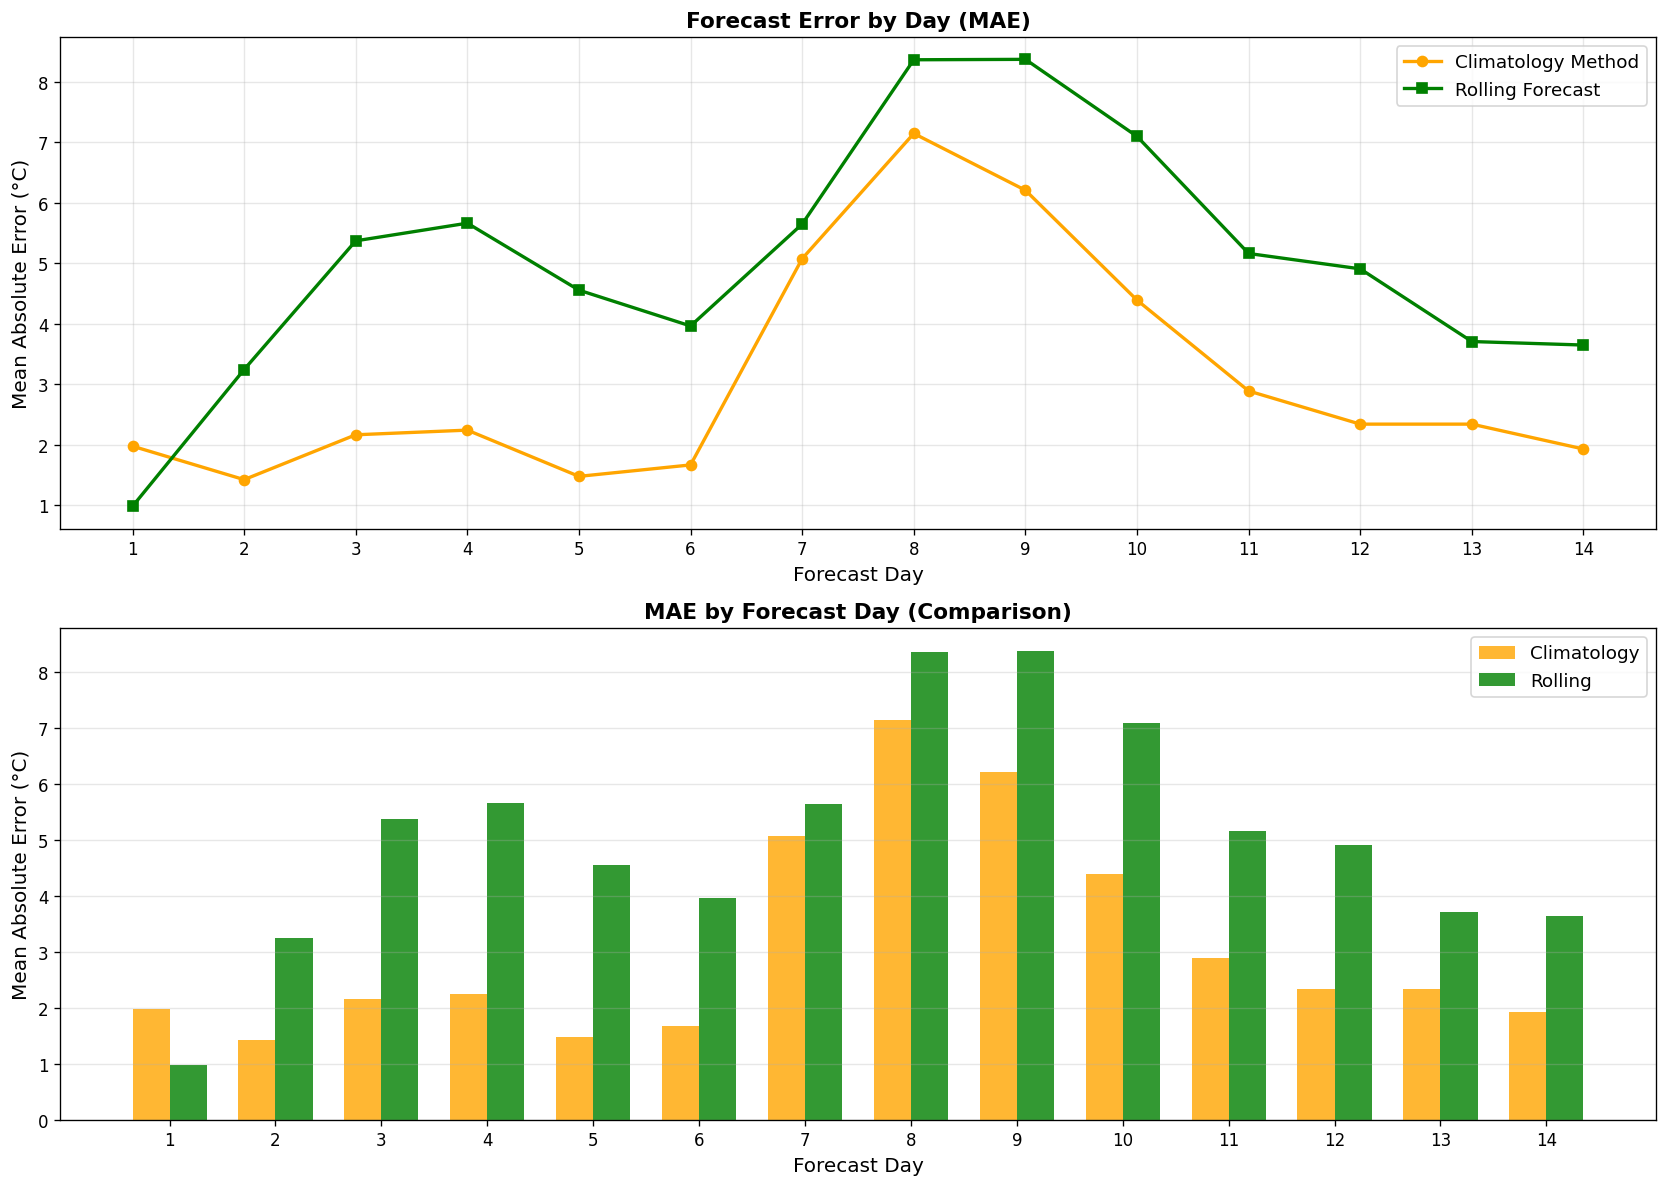


COMPARISON SUMMARY

Climatology Method (historical averages as lags):
  Overall MAE:  3.0896 °C
  Day 1-7 MAE:  2.2887 °C
  Day 8-14 MAE: 3.8905 °C

Rolling Forecast (predicted values as lags):
  Overall MAE:  5.0471 °C
  Day 1-7 MAE:  4.2023 °C
  Day 8-14 MAE: 5.8919 °C


In [19]:
# ============================================================================
# Cell 17: 分桶分析 - 预测效果随时间变化
# ============================================================================

# 比较两种方法：Climatology vs Rolling
comparison_df = test_df_rolling.copy()
comparison_df['predictions_climatology'] = test_df['predictions']  # 从之前的结果
comparison_df['abs_error_climatology'] = np.abs(comparison_df['temp_obs'] - comparison_df['predictions_climatology'])
comparison_df['abs_error_rolling'] = np.abs(comparison_df['temp_obs'] - comparison_df['predictions_rolling'])

# 创建天数标签（第1天、第2天...）
comparison_df['forecast_day'] = (comparison_df['time'] - comparison_df['time'].min()).dt.days + 1

# 按天分组计算metrics
daily_metrics = comparison_df.groupby('forecast_day').agg({
    'abs_error_climatology': ['mean', 'std'],
    'abs_error_rolling': ['mean', 'std']
}).round(3)

daily_metrics.columns = ['Climatology_MAE', 'Climatology_Std', 'Rolling_MAE', 'Rolling_Std']
daily_metrics['Day'] = daily_metrics.index

print("Daily Forecast Performance:")
print(daily_metrics.to_string(index=False))

# 可视化：误差随时间变化
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# 1. MAE随天数变化
axes[0].plot(daily_metrics['Day'], daily_metrics['Climatology_MAE'], 
             marker='o', linewidth=2, label='Climatology Method', color='orange')
axes[0].plot(daily_metrics['Day'], daily_metrics['Rolling_MAE'], 
             marker='s', linewidth=2, label='Rolling Forecast', color='green')
axes[0].set_xlabel('Forecast Day', fontsize=12)
axes[0].set_ylabel('Mean Absolute Error (°C)', fontsize=12)
axes[0].set_title('Forecast Error by Day (MAE)', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(range(1, 15))

# 2. 逐小时误差热图
comparison_df['forecast_hour'] = ((comparison_df['time'] - comparison_df['time'].min()).dt.total_seconds() / 3600).astype(int) + 1

hourly_bins = pd.cut(comparison_df['forecast_hour'], bins=14, labels=range(1, 15))
comparison_df['bin'] = hourly_bins

bin_metrics_clim = comparison_df.groupby('bin')['abs_error_climatology'].mean()
bin_metrics_roll = comparison_df.groupby('bin')['abs_error_rolling'].mean()

x = np.arange(len(bin_metrics_clim))
width = 0.35

axes[1].bar(x - width/2, bin_metrics_clim, width, label='Climatology', color='orange', alpha=0.8)
axes[1].bar(x + width/2, bin_metrics_roll, width, label='Rolling', color='green', alpha=0.8)
axes[1].set_xlabel('Forecast Day', fontsize=12)
axes[1].set_ylabel('Mean Absolute Error (°C)', fontsize=12)
axes[1].set_title('MAE by Forecast Day (Comparison)', fontsize=13, fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(range(1, 15))
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# 打印统计
print("\n" + "="*60)
print("COMPARISON SUMMARY")
print("="*60)
print(f"\nClimatology Method (historical averages as lags):")
print(f"  Overall MAE:  {comparison_df['abs_error_climatology'].mean():.4f} °C")
print(f"  Day 1-7 MAE:  {comparison_df[comparison_df['forecast_day'] <= 7]['abs_error_climatology'].mean():.4f} °C")
print(f"  Day 8-14 MAE: {comparison_df[comparison_df['forecast_day'] > 7]['abs_error_climatology'].mean():.4f} °C")

print(f"\nRolling Forecast (predicted values as lags):")
print(f"  Overall MAE:  {comparison_df['abs_error_rolling'].mean():.4f} °C")
print(f"  Day 1-7 MAE:  {comparison_df[comparison_df['forecast_day'] <= 7]['abs_error_rolling'].mean():.4f} °C")
print(f"  Day 8-14 MAE: {comparison_df[comparison_df['forecast_day'] > 7]['abs_error_rolling'].mean():.4f} °C")
print("="*60)

In [20]:
import joblib
import os

# Create directories if they don't exist
os.makedirs('models', exist_ok=True)
os.makedirs('data/results', exist_ok=True)

# Save the trained model
MODEL_PATH = 'models/xgb_temperature_model.pkl'
joblib.dump(model, MODEL_PATH)
print(f"✓ Model saved to: {MODEL_PATH}")

# Save test predictions
RESULTS_PATH = 'data/results/test_predictions_climatology.csv'
test_df[['time', 'temp_obs', 'predictions', 'residuals']].to_csv(RESULTS_PATH, index=False)
print(f"✓ Test predictions saved to: {RESULTS_PATH}")

# Save metrics summary
metrics_summary = pd.DataFrame({
    'Dataset': ['Training', 'Validation', 'Test'],
    'MAE': [train_mae, val_mae, test_mae],
    'RMSE': [train_rmse, val_rmse, test_rmse],
    'R²': [train_r2, val_r2, test_r2]
})

METRICS_PATH = 'data/results/model_metrics.csv'
metrics_summary.to_csv(METRICS_PATH, index=False)
print(f"✓ Metrics saved to: {METRICS_PATH}")

print("\n" + "="*60)
print("All results saved successfully!")
print("="*60)

✓ Model saved to: models/xgb_temperature_model.pkl
✓ Test predictions saved to: data/results/test_predictions_climatology.csv
✓ Metrics saved to: data/results/model_metrics.csv

All results saved successfully!
